In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import cv2
import os

In [ ]:
categories=os.listdir("/content/drive/MyDrive/Project_dataset")
print("Categories:",categories)
labels=[]

for f_name in categories:
    if f_name=='stale_apple':
        labels.append(0)
    elif f_name=='stale_banana':
        labels.append(1)
    if f_name=='fresh_apple':
        labels.append(2)
    elif f_name=='stale_capsicum':
        labels.append(3)
    if f_name=='stale_tomato':
        labels.append(4)
    elif f_name=='fresh_bitter_gourd':
        labels.append(5)
    if f_name=='fresh_capsicum':
        labels.append(6)
    elif f_name=='fresh_orange':
        labels.append(7)
    if f_name=='fresh_tomato':
        labels.append(8)
    elif f_name=='stale_bitter_gourd':
        labels.append(9)
    if f_name=='stale_orange':
        labels.append(10)
    elif f_name=='fresh_banana':
        labels.append(11)
print("Labels:",labels)

label_dict={}
for i in range(len(labels)):
    label_dict[categories[i]]=labels[i]
print("Categories as keys and labels as values:",label_dict)

Categories: ['stale_apple', 'fresh_apple', 'stale_banana', 'stale_capsicum', 'fresh_bitter_gourd', 'stale_tomato', 'fresh_capsicum', 'fresh_orange', 'fresh_tomato', 'stale_bitter_gourd', 'stale_orange', 'fresh_banana']
Labels: [0, 2, 1, 3, 5, 4, 6, 7, 8, 9, 10, 11]
Categories as keys and labels as values: {'stale_apple': 0, 'fresh_apple': 2, 'stale_banana': 1, 'stale_capsicum': 3, 'fresh_bitter_gourd': 5, 'stale_tomato': 4, 'fresh_capsicum': 6, 'fresh_orange': 7, 'fresh_tomato': 8, 'stale_bitter_gourd': 9, 'stale_orange': 10, 'fresh_banana': 11}


In [ ]:
data = []
data_labels = []
data_path=os.path.join('/content/drive/MyDrive/Project_dataset')

for category in categories:
        path = os.path.join(data_path,category)
        images = os.listdir(path)
        for a in images:
            image=os.path.join(path,a)
            img=cv2.imread(image)
            try:
                gray_scale=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
                gray=cv2.resize(gray_scale,(100,100))
                data.append(gray)
                data_labels.append(label_dict[category])
            except Exception as e:
                print("Error loading image:",e)

In [ ]:
print("Total Number of Images are:",len(data))
print("Total number of labels are:",len(data_labels))

Total Number of Images are: 14681
Total number of labels are: 14681


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(data,data_labels,test_size=0.2)

In [ ]:
Y_test2= Y_test
print(Y_test2)

[2, 1, 10, 10, 7, 6, 7, 1, 0, 7, 0, 0, 1, 11, 5, 1, 7, 8, 5, 8, 5, 4, 1, 7, 10, 6, 7, 2, 7, 2, 2, 8, 11, 4, 11, 6, 2, 0, 10, 8, 2, 10, 7, 10, 2, 3, 7, 7, 2, 10, 0, 10, 4, 7, 1, 1, 0, 7, 2, 11, 0, 11, 0, 8, 0, 4, 2, 0, 6, 0, 1, 2, 6, 0, 1, 4, 11, 0, 3, 8, 2, 10, 10, 8, 8, 9, 2, 6, 7, 8, 4, 11, 11, 8, 11, 9, 6, 2, 4, 10, 11, 10, 0, 11, 4, 7, 10, 2, 3, 4, 11, 0, 6, 3, 7, 10, 0, 8, 7, 2, 2, 11, 0, 2, 2, 2, 6, 4, 4, 3, 2, 7, 8, 0, 2, 7, 1, 5, 9, 3, 8, 10, 3, 8, 0, 1, 6, 7, 7, 0, 6, 2, 1, 6, 0, 1, 1, 10, 6, 11, 6, 4, 2, 3, 11, 4, 1, 1, 11, 3, 11, 7, 7, 8, 0, 1, 10, 11, 8, 10, 6, 1, 10, 4, 0, 2, 0, 0, 0, 10, 10, 1, 4, 0, 7, 0, 1, 2, 8, 6, 5, 1, 1, 11, 6, 1, 8, 2, 11, 0, 5, 8, 10, 2, 0, 10, 2, 8, 7, 6, 0, 7, 6, 2, 11, 10, 2, 1, 2, 0, 2, 10, 2, 7, 1, 6, 0, 10, 7, 1, 7, 0, 0, 8, 6, 5, 6, 2, 10, 2, 11, 0, 2, 0, 3, 7, 11, 3, 10, 0, 0, 10, 0, 11, 3, 0, 7, 11, 0, 10, 11, 4, 0, 1, 0, 6, 11, 0, 2, 7, 11, 2, 2, 2, 7, 10, 2, 7, 1, 7, 8, 10, 3, 0, 3, 0, 11, 7, 10, 0, 11, 6, 0, 1, 0, 10, 10, 4, 0, 11, 0, 

In [ ]:
print("Number of Training images are",len(X_train))
print("Number of Testing images are",len(X_test))
print("Number of Training labels are",len(Y_train))
print("Number of Testing labels are",len(Y_test))

Number of Training images are 11744
Number of Testing images are 2937
Number of Training labels are 11744
Number of Testing labels are 2937


In [ ]:
X_train=np.array(X_train)
X_test=np.array(X_test)
Y_train=np.array(Y_train)
Y_test=np.array(Y_test)

In [ ]:
X_train=np.reshape(X_train,(11744,100,100,1))
X_test=np.reshape(X_test,(2937,100,100,1))

In [ ]:
print("Shape of training images:",X_train.shape)
print("shape of testing images:",X_test.shape)

Shape of training images: (11744, 100, 100, 1)
shape of testing images: (2937, 100, 100, 1)


In [ ]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
 
X_train=X_train/255.0
X_test=X_test/255.0

In [ ]:
from tensorflow.keras.utils import to_categorical

Y_train=tf.keras.utils.to_categorical(Y_train,12)
Y_test=tf.keras.utils.to_categorical(Y_test,12)

In [ ]:
print("Shape of testing images labels:",Y_test.shape)
print("Shape of training images labels:",Y_train.shape)

Shape of testing images labels: (2937, 12)
Shape of training images labels: (11744, 12)


In [ ]:
model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=(100,100,1),padding="same",activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(100,(3,3),padding="same",activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(50,(3,3),padding="same",activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dropout(0.5))

model.add(Dense(50,activation='relu'))

model.add(Dense(12, activation='softmax'))

 
model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

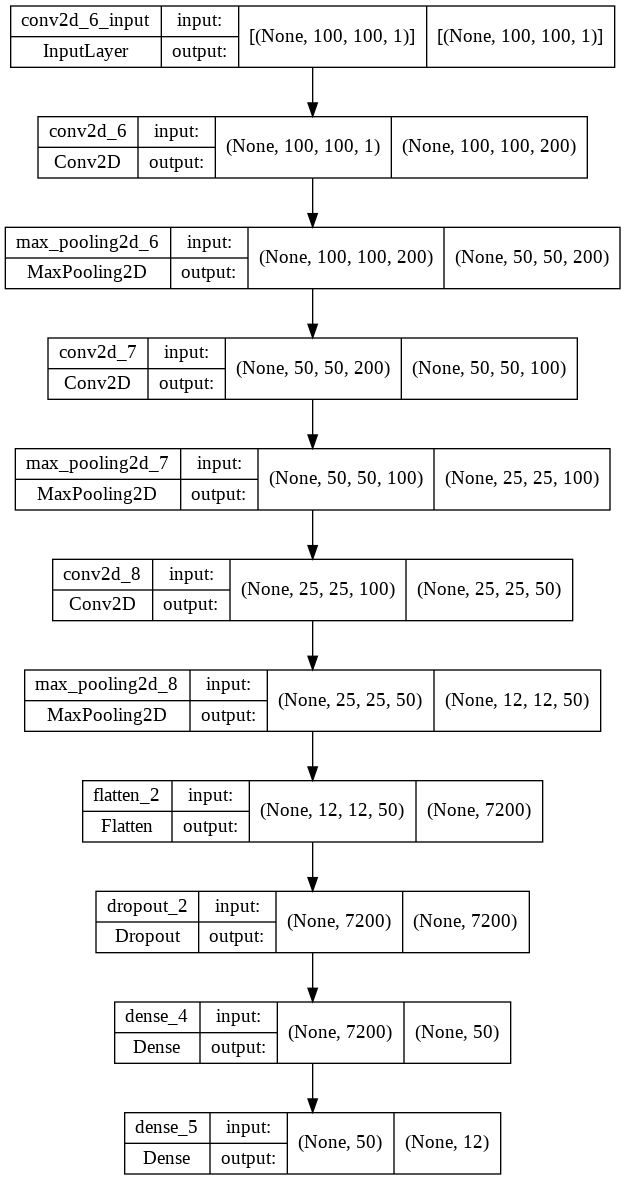

In [ ]:
keras.utils.plot_model(model,"model_flowchart.png",show_shapes=True)

In [ ]:
history = model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=20,batch_size=32)

Epoch 1/20
367/367 [==============================] - 35s 93ms/step - loss: 1.4146 - accuracy: 0.4825 - val_loss: 0.8626 - val_accuracy: 0.6769
Epoch 2/20
367/367 [==============================] - 34s 92ms/step - loss: 0.8473 - accuracy: 0.6786 - val_loss: 0.6964 - val_accuracy: 0.7514
Epoch 3/20
367/367 [==============================] - 34s 92ms/step - loss: 0.6672 - accuracy: 0.7501 - val_loss: 0.6482 - val_accuracy: 0.7446
Epoch 4/20
367/367 [==============================] - 34s 92ms/step - loss: 0.5572 - accuracy: 0.7876 - val_loss: 0.4541 - val_accuracy: 0.8335
Epoch 5/20
367/367 [==============================] - 33s 91ms/step - loss: 0.4649 - accuracy: 0.8208 - val_loss: 0.4115 - val_accuracy: 0.8390
Epoch 6/20
367/367 [==============================] - 34s 92ms/step - loss: 0.4086 - accuracy: 0.8455 - val_loss: 0.4752 - val_accuracy: 0.8185
Epoch 7/20
367/367 [==============================] - 34s 92ms/step - loss: 0.3484 - accuracy: 0.8709 - val_loss: 0.3825 - val_accuracy:

In [ ]:
loss,acc=model.evaluate(X_test,Y_test)
print("ACCURACY: ",acc*100)
print("LOSS: ",loss*100)

92/92 [==============================] - 3s 32ms/step - loss: 0.2028 - accuracy: 0.9285
ACCURACY:  92.84984469413757
LOSS:  20.2800914645195


In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


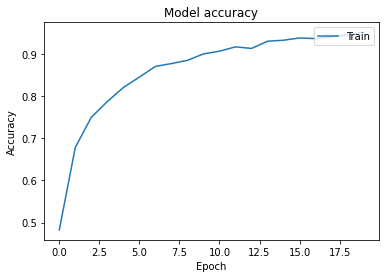

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()


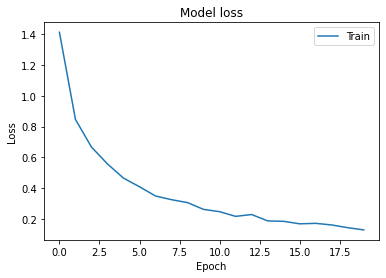

In [ ]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

In [ ]:
y_pred=model.predict(X_test)
y_pred=np.argmax(y_pred,axis=1)

In [ ]:
category_labels=dict(sorted(label_dict.items(), key=lambda item: item[1]))
for k,v in category_labels.items():
  print(v,"  ",k)

0    stale_apple
1    stale_banana
2    fresh_apple
3    stale_capsicum
4    stale_tomato
5    fresh_bitter_gourd
6    fresh_capsicum
7    fresh_orange
8    fresh_tomato
9    stale_bitter_gourd
10    stale_orange
11    fresh_banana


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_pred,Y_test2))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88       450
           1       0.98      0.96      0.97       316
           2       0.92      0.89      0.90       351
           3       0.97      0.95      0.96       175
           4       0.92      0.97      0.94       190
           5       1.00      0.95      0.97        56
           6       0.95      0.96      0.96       178
           7       0.95      0.92      0.93       319
           8       1.00      0.95      0.97       219
           9       0.90      0.96      0.93        56
          10       0.81      0.87      0.84       279
          11       0.98      0.97      0.98       348

    accuracy                           0.93      2937
   macro avg       0.94      0.94      0.94      2937
weighted avg       0.93      0.93      0.93      2937



In [ ]:
print(confusion_matrix(y_pred,Y_test2))

[[404   3  11   0   0   0   0   2   0   0  28   2]
 [  2 303   0   0   1   0   0   0   0   3   5   2]
 [ 29   0 311   0   0   0   0   9   0   0   2   0]
 [  0   0   0 166   0   0   6   0   0   0   3   0]
 [  0   0   0   2 184   0   3   0   1   0   0   0]
 [  0   0   0   0   0  53   0   0   0   3   0   0]
 [  0   0   0   3   4   0 171   0   0   0   0   0]
 [  1   0   8   0   0   0   0 293   0   0  16   1]
 [  1   0   0   0  11   0   0   0 207   0   0   0]
 [  0   2   0   0   0   0   0   0   0  54   0   0]
 [ 24   0   5   0   0   0   0   5   0   0 243   2]
 [  2   2   2   0   0   0   0   1   0   0   3 338]]


In [ ]:
model.save('veg_classifier.h5')